1. Importación de Datos y exploración inicial

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el archivo CSV (adaptado con separadores regionales)
# El archivo 'digital_health_and_mental_wellness.csv' está en la misma carpeta que este notebook
df = pd.read_csv('digital_health_and_mental_wellness.csv', sep=';', decimal=',')

# Visualizamos las primeras filas del DataFrame
df.head()

,id,edad,genero,pais,nivel_ingresos,nivel_educativo,rol_diario,horas_dispositivo_día,desbloqueo_ teléfono,notificaciones_dia,...,calidad_suaeño,nivel_ansiedad,nivel_depresion,nivel_estres,nivel_felicidad,nivel_concentracion,indicador_riesgo_alto,tipo_dispositivo,nivel_productividad,nivel_dependencia_digital
0,1,40,Femenino,Asia,Alto,Escuela Secundaria,Tiempo parcial/Turno,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Masculino,África,Medio-Bajo,Master,Empleado a tiempo completo,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Masculino,Norteamérica,Medio-Bajo,Bachiller,Empleado a tiempo completo,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Femenino,Oriente Medio,Bajo,Master,Cuidador / hogar,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Femenino,Europa,Medio-Bajo,Bachiller,Empleado a tiempo completo,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


2. Verificación de columnas relevantes

In [2]:
# Listamos todas las columnas disponibles
print("Columnas del dataset:")
print(df.columns.tolist())

# Seleccionamos las variables clave para el estudio
variables_sociodemograficas = ['edad', 'genero', 'pais', 'nivel_ingresos', 'nivel_educativo']
variables_uso_digital = ['horas_dispositivo_día', 'desbloqueo_ teléfono', 'notificaciones_dia',
                         'minutos_redes_sociales', 'tipo_dispositivo', 'nivel_dependencia_digital']
variables_bienestar = ['nivel_ansiedad', 'nivel_depresion', 'nivel_estres', 'nivel_felicidad',
                       'nivel_concentracion', 'horas_sueño_dia', 'calidad_suaeño', 'dias_actividad_física']
variables_resultado = ['nivel_productividad', 'indicador_riesgo_alto']

# Creamos un subconjunto del DataFrame con las variables seleccionadas
df_estudio = df[variables_sociodemograficas + variables_uso_digital + variables_bienestar + variables_resultado]

# Mostramos un resumen estadístico de las variables numéricas
df_estudio.describe()

Columnas del dataset:
['id', 'edad', 'genero', 'pais', 'nivel_ingresos', 'nivel_educativo', 'rol_diario', 'horas_dispositivo_día', 'desbloqueo_ teléfono', 'notificaciones_dia', 'minutos_redes_sociales', 'minutos_de_estudio', 'dias_actividad_física', 'horas_sueño_dia', 'calidad_suaeño', 'nivel_ansiedad', 'nivel_depresion', 'nivel_estres', 'nivel_felicidad', 'nivel_concentracion', 'indicador_riesgo_alto', 'tipo_dispositivo', 'nivel_productividad', 'nivel_dependencia_digital']


,edad,horas_dispositivo_día,desbloqueo_ teléfono,notificaciones_dia,minutos_redes_sociales,nivel_dependencia_digital,nivel_ansiedad,nivel_depresion,nivel_estres,nivel_felicidad,nivel_concentracion,horas_sueño_dia,calidad_suaeño,dias_actividad_física,nivel_productividad,indicador_riesgo_alto
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,28.078571,7.317677,147.107429,335.117143,159.362857,36.684152,7.183858,8.830000,5.076560,6.418568,41.598600,7.254481,2.708848,3.350000,65.299301,0.201429
std,9.352385,3.239838,67.770656,239.678612,132.748048,14.115504,5.043220,5.738959,3.403503,3.019828,23.764574,1.291879,1.101105,1.877976,9.664716,0.401125
min,13.000000,0.280000,9.000000,22.000000,0.000000,5.600000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,33.000000,0.000000
25%,21.000000,4.867500,96.000000,170.000000,68.000000,26.200000,4.000000,4.000000,1.341488,4.000000,24.750000,6.410545,1.919438,2.000000,59.000000,0.000000
50%,27.000000,6.760000,136.000000,268.000000,119.000000,35.300000,6.000000,8.000000,4.809726,7.500000,44.000000,7.291580,2.907819,3.000000,65.299301,0.000000
75%,34.000000,9.152500,187.000000,434.000000,204.000000,45.100000,8.845008,13.000000,8.794302,8.900000,59.000000,8.162298,3.276968,5.000000,71.000000,0.000000
max,50.000000,17.160000,374.000000,1211.000000,631.000000,89.200000,27.154217,27.000000,10.000000,10.000000,100.000000,11.004566,5.000000,7.000000,95.000000,1.000000


3. Comprobación de valores nulos y tipos de datos

In [3]:
# Verificamos si hay valores nulos
print("Valores nulos por columna:")
print(df_estudio.isnull().sum())

# Revisamos los tipos de datos para futuras transformaciones
print("Tipos de datos:")
print(df_estudio.dtypes)

Valores nulos por columna:
edad                         0
genero                       0
pais                         0
nivel_ingresos               0
nivel_educativo              0
horas_dispositivo_día        0
desbloqueo_ teléfono         0
notificaciones_dia           0
minutos_redes_sociales       0
tipo_dispositivo             0
nivel_dependencia_digital    0
nivel_ansiedad               0
nivel_depresion              0
nivel_estres                 0
nivel_felicidad              0
nivel_concentracion          0
horas_sueño_dia              0
calidad_suaeño               0
dias_actividad_física        0
nivel_productividad          0
indicador_riesgo_alto        0
dtype: int64
Tipos de datos:
edad                           int64
genero                        object
pais                          object
nivel_ingresos                object
nivel_educativo               object
horas_dispositivo_día        float64
desbloqueo_ teléfono           int64
notificaciones_dia             int

4. Filtrado inicial por edad y exploración con NumPy
Este bloque aplica los criterios de segmentación por edad y comienza a trabajar con arrays NumPy para cálculos vectorizados, como se indica en el punto 2 del diseño del estudio.

In [6]:
# Creamos una copia segura del subconjunto del DataFrame
df_estudio = df[variables_sociodemograficas + variables_uso_digital + variables_bienestar + variables_resultado].copy()

# Segmentamos la muestra por rangos de edad usando .loc para evitar advertencias
df_estudio.loc[:, 'grupo_edad'] = pd.cut(df_estudio['edad'],
                                         bins=[12, 17, 30, 50],
                                         labels=['adolescente', 'joven', 'adulto'])

# Contamos cuántas personas hay en cada grupo
df_estudio['grupo_edad'].value_counts()

grupo_edad
joven          1769
adulto         1281
adolescente     450
Name: count, dtype: int64

5. Análisis exploratorio con Panda

5.1. Distribución de género y país

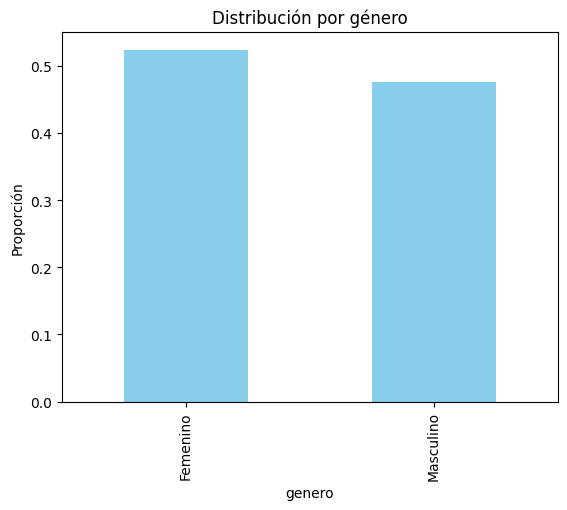

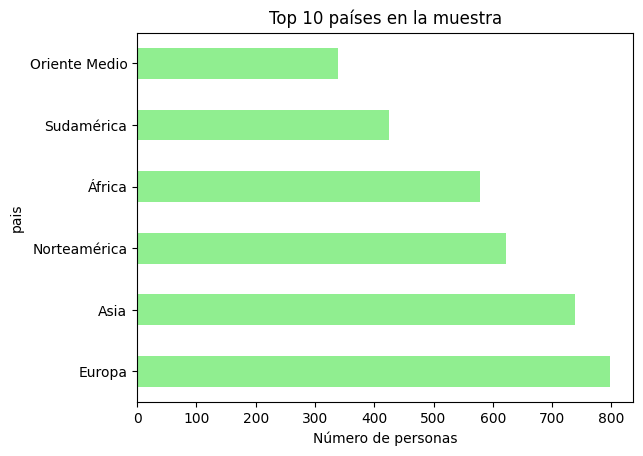

In [7]:
# Distribución de género
df_estudio['genero'].value_counts(normalize=True).plot(kind='bar', title='Distribución por género', color='skyblue')
plt.ylabel('Proporción')
plt.show()

# Distribución de país (top 10)
df_estudio['pais'].value_counts().head(10).plot(kind='barh', title='Top 10 países en la muestra', color='lightgreen')
plt.xlabel('Número de personas')
plt.show()

5.2. Agrupaciones y comparaciones con groupby()

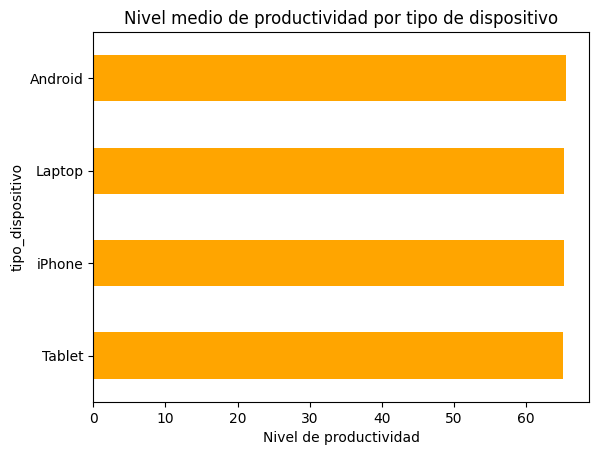

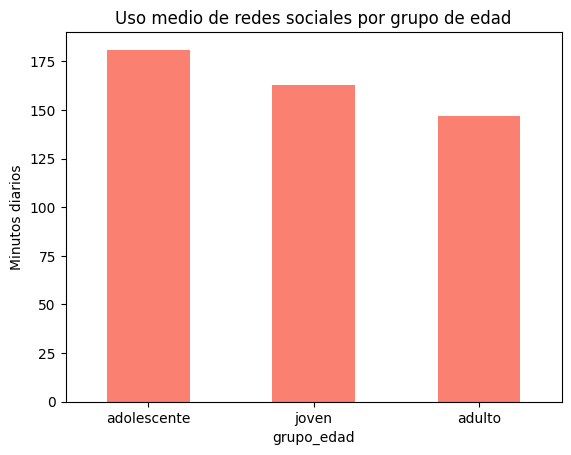

In [9]:
# Nivel medio de productividad por tipo de dispositivo
df_estudio.groupby('tipo_dispositivo', observed=True)['nivel_productividad'].mean().sort_values().plot(
    kind='barh', color='orange', title='Nivel medio de productividad por tipo de dispositivo')
plt.xlabel('Nivel de productividad')
plt.show()

# Uso medio de redes sociales por grupo de edad
df_estudio.groupby('grupo_edad', observed=True)['minutos_redes_sociales'].mean().plot(
    kind='bar', color='salmon', title='Uso medio de redes sociales por grupo de edad')
plt.ylabel('Minutos diarios')
plt.xticks(rotation=0)
plt.show()

5.3. Filtros con .query()

In [10]:
# Personas con alta dependencia digital y ansiedad elevada
filtro_dependencia_ansiedad = df_estudio.query('nivel_dependencia_digital > 7 and nivel_ansiedad > 7')
print(f"Total de personas con alta dependencia y ansiedad elevada: {len(filtro_dependencia_ansiedad)}")

# Muestra de los primeros casos
filtro_dependencia_ansiedad[['edad', 'genero', 'nivel_dependencia_digital', 'nivel_ansiedad']].head()

Total de personas con alta dependencia y ansiedad elevada: 1330


,edad,genero,nivel_dependencia_digital,nivel_ansiedad
0,40,Femenino,25.700000,9.926651
3,41,Femenino,36.684152,7.093357
4,26,Femenino,48.400000,7.028125
5,37,Femenino,21.200000,7.954750
6,18,Femenino,32.800000,7.510412


5.4. Detección de valores nulos y duplicados

In [11]:
# Valores nulos por columna
nulos = df_estudio.isnull().sum()
print("Columnas con valores nulos:")
print(nulos[nulos > 0])

# Eliminación de duplicados si los hubiera
df_estudio = df_estudio.drop_duplicates()

Columnas con valores nulos:
Series([], dtype: int64)


6. Limpieza avanzada de datos

6.1. Codificación de variables categóricas con get_dummies()

In [12]:
# Codificamos las variables categóricas para análisis estadístico y visualización
df_codificado = pd.get_dummies(df_estudio, columns=['genero', 'pais', 'tipo_dispositivo'], drop_first=True)

# Verificamos que se han creado las nuevas columnas
df_codificado.head()

,edad,nivel_ingresos,nivel_educativo,horas_dispositivo_día,desbloqueo_ teléfono,notificaciones_dia,minutos_redes_sociales,nivel_dependencia_digital,nivel_ansiedad,nivel_depresion,...,grupo_edad,genero_Masculino,pais_Europa,pais_Norteamérica,pais_Oriente Medio,pais_Sudamérica,pais_África,tipo_dispositivo_Laptop,tipo_dispositivo_Tablet,tipo_dispositivo_iPhone
0,40,Alto,Escuela Secundaria,3.54,45,561,98,25.700000,9.926651,5.0,...,adulto,False,False,False,False,False,False,False,False,False
1,27,Medio-Bajo,Master,5.65,100,393,174,30.100000,4.000000,4.0,...,joven,True,False,False,False,False,True,True,False,False
2,31,Medio-Bajo,Bachiller,8.87,181,231,595,40.600000,4.000000,8.0,...,adulto,True,False,True,False,False,False,False,False,False
3,41,Bajo,Master,4.05,94,268,18,36.684152,7.093357,9.0,...,adulto,False,False,False,True,False,False,False,True,False
4,26,Medio-Bajo,Bachiller,13.07,199,91,147,48.400000,7.028125,15.0,...,joven,False,True,False,False,False,False,False,False,False


6.2. Normalización de variables numéricas para análisis comparativos

In [13]:
# Normalizamos algunas variables para análisis comparativo
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos columnas a normalizar
variables_a_normalizar = ['minutos_redes_sociales', 'nivel_productividad', 'nivel_dependencia_digital']

# Creamos el escalador
escalador = MinMaxScaler()

# Aplicamos la normalización
df_codificado[variables_a_normalizar] = escalador.fit_transform(df_codificado[variables_a_normalizar])

# Comprobamos los resultados
df_codificado[variables_a_normalizar].describe()

,minutos_redes_sociales,nivel_productividad,nivel_dependencia_digital
count,3500.000000,3500.000000,3500.000000
mean,0.252556,0.520956,0.371820
std,0.210377,0.155883,0.168846
min,0.000000,0.000000,0.000000
25%,0.107765,0.419355,0.246411
50%,0.188590,0.520956,0.355263
75%,0.323296,0.612903,0.472488
max,1.000000,1.000000,1.000000


6.3. Detección de outliers con boxplots

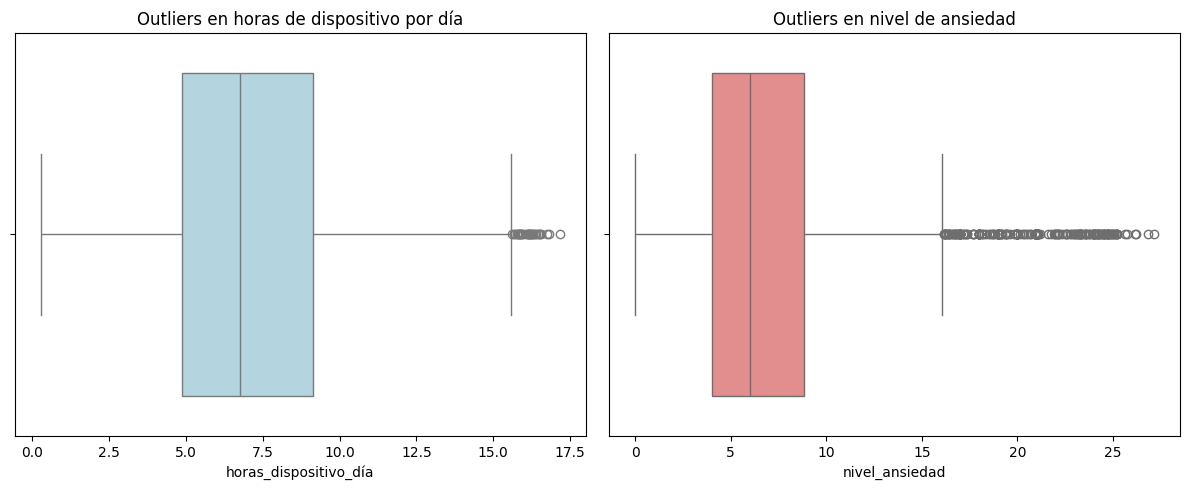

In [14]:
# Visualizamos outliers en horas de dispositivo y nivel de ansiedad
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_codificado['horas_dispositivo_día'], color='lightblue')
plt.title('Outliers en horas de dispositivo por día')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_codificado['nivel_ansiedad'], color='lightcoral')
plt.title('Outliers en nivel de ansiedad')

plt.tight_layout()
plt.show()

7. Visualización estadística con Seaborn

7.1. Histogramas de bienestar y productividad

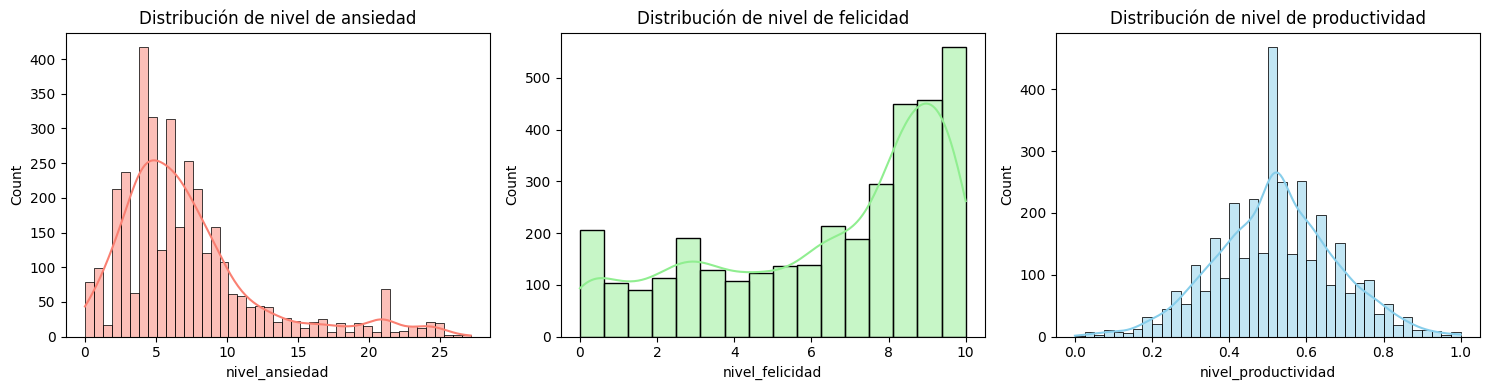

In [15]:
# Histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_codificado['nivel_ansiedad'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Distribución de nivel de ansiedad')

sns.histplot(df_codificado['nivel_felicidad'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de nivel de felicidad')

sns.histplot(df_codificado['nivel_productividad'], kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Distribución de nivel de productividad')

plt.tight_layout()
plt.show()

7.2. Boxplot de estrés por tipo de dispositivo

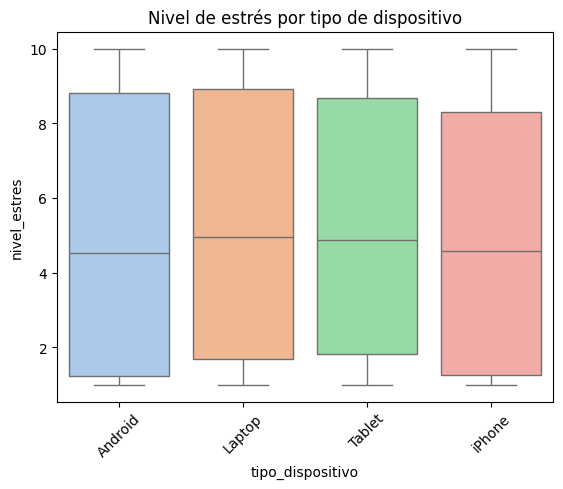

In [17]:
# Boxplot corregido para evitar advertencia de Seaborn
sns.boxplot(x='tipo_dispositivo', y='nivel_estres', hue='tipo_dispositivo',
            data=df_estudio, palette='pastel', legend=False)
plt.title('Nivel de estrés por tipo de dispositivo')
plt.xticks(rotation=45)
plt.show()

In [ ]:
7.3. Heatmap de correlaciones solo para variables cuantitativas

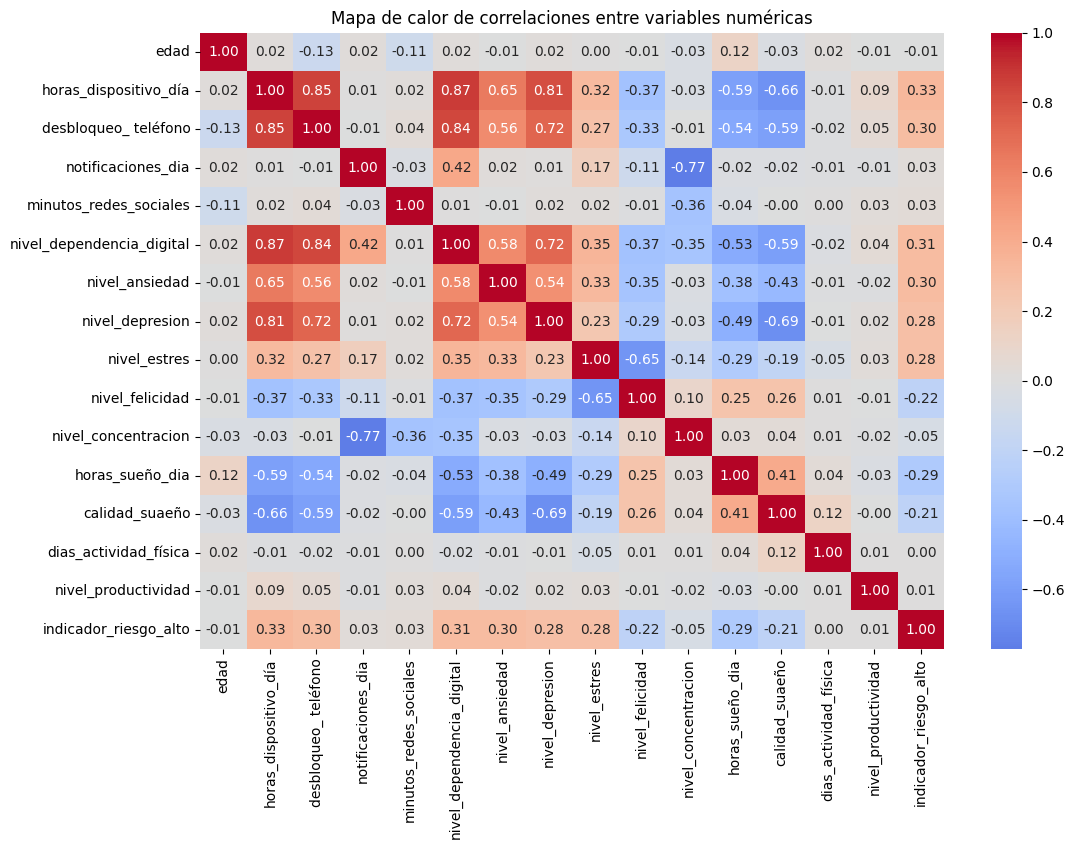

In [19]:
# Mapa de calor de correlaciones

# Seleccionamos solo las columnas numéricas
df_numerico = df_codificado.select_dtypes(include=['number'])

# Eliminamos columnas con valores no válidos (NaN o inf)
df_numerico = df_numerico.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Calculamos la matriz de correlación
correlaciones = df_numerico.corr()

# Visualizamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

7.4. Pairplot de variables clave 

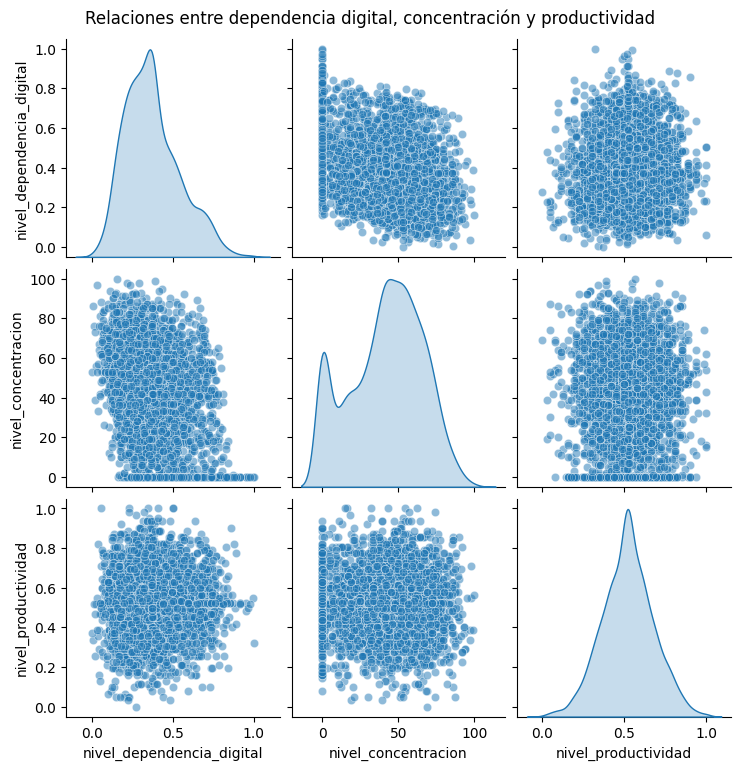

In [20]:
# 🔗 Relaciones entre dependencia, concentración y productividad

# Verificamos que no haya valores nulos en las columnas seleccionadas
columnas_pairplot = ['nivel_dependencia_digital', 'nivel_concentracion', 'nivel_productividad']
df_pairplot = df_codificado[columnas_pairplot].dropna()

# Creamos el pairplot
sns.pairplot(df_pairplot, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Relaciones entre dependencia digital, concentración y productividad', y=1.02)
plt.show()

### Conclusiones estadísticas observables

### 1. Distribuciones individuales (diagonales del gráfico)
- Dependencia digital: La distribución parece sesgada hacia valores altos, lo que sugiere que una parte significativa de la muestra presenta niveles elevados de dependencia.
- Concentración: La curva muestra una distribución más simétrica, aunque con cierta dispersión.
- Productividad: La densidad parece más concentrada en valores medios-altos, lo que podría indicar que la productividad no se ve tan afectada en general.

### 2. Relaciones entre variables (gráficas fuera de la diagonal)

#### Dependencia digital vs concentración
- Se observa una tendencia negativa: a mayor dependencia digital, menor nivel de concentración.
- Esto sugiere una posible correlación inversa, que podría confirmarse con un coeficiente de correlación de Pearson.

#### Dependencia digital vs productividad
- La nube de puntos muestra una dispersión amplia, pero con una ligera pendiente descendente.
- Esto indica que la productividad podría verse afectada negativamente*por altos niveles de dependencia digital, aunque la relación no parece fuerte.

#### Concentración vs productividad
- Aquí se aprecia una relación positiva más clara: a mayor concentración, mayor productividad.
- Esta correlación parece más consistente, lo que la convierte en una buena candidata para una regresión lineal simple.

## Siguiente paso
Vamos a cuantificar estas observaciones con:
- `df.corr()` para obtener los coeficientes de correlación.
- Una regresión lineal entre concentración y productividad.
- Un análisis de regresión múltiple si quieres incluir dependencia digital como variable de control.

8. Análisis estadístico básico

In [ ]:
8.1. Correlaciones entre variables clave

In [21]:
# Correlaciones entre dependencia digital, concentración y productividad
variables_correlacion = ['nivel_dependencia_digital', 'nivel_concentracion', 'nivel_productividad']

# Eliminamos filas con valores nulos en estas columnas
df_correlacion = df_codificado[variables_correlacion].dropna()

# Calculamos la matriz de correlación de Pearson
correlaciones = df_correlacion.corr(method='pearson')

print("Matriz de correlación (Pearson):")
print(correlaciones)

Matriz de correlación (Pearson):
                           nivel_dependencia_digital  nivel_concentracion  \
nivel_dependencia_digital                   1.000000            -0.346359   
nivel_concentracion                        -0.346359             1.000000   
nivel_productividad                         0.039561            -0.016047   

                           nivel_productividad  
nivel_dependencia_digital             0.039561  
nivel_concentracion                  -0.016047  
nivel_productividad                   1.000000  


In [ ]:
8.2. Regresión lineal simple: concentración → productividad

Pendiente: -0.00
Intercepto: 0.53
Coeficiente de correlación (r): -0.02
Valor p: 0.3426
Error estándar: 0.00


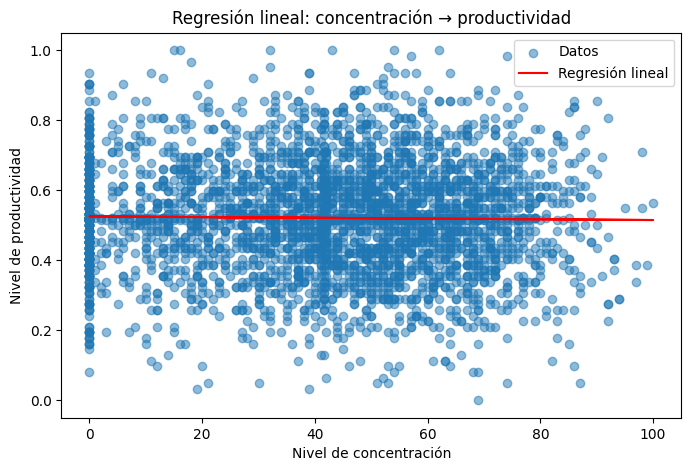

In [22]:
# Regresión lineal simple con scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

# Variables independientes y dependientes
x = df_correlacion['nivel_concentracion']
y = df_correlacion['nivel_productividad']

# Aplicamos regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Mostramos resultados
print(f"Pendiente: {slope:.2f}")
print(f"Intercepto: {intercept:.2f}")
print(f"Coeficiente de correlación (r): {r_value:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Error estándar: {std_err:.2f}")

# Visualización de la regresión
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label='Datos')
plt.plot(x, intercept + slope * x, color='red', label='Regresión lineal')
plt.xlabel('Nivel de concentración')
plt.ylabel('Nivel de productividad')
plt.title('Regresión lineal: concentración → productividad')
plt.legend()
plt.show()

## Interpretación de la regresión lineal

### 1. Pendiente cercana a cero
- La línea roja es prácticamente horizontal.
- Esto indica que **los cambios en el nivel de concentración no producen variaciones significativas en la productividad** dentro de este conjunto de datos.

### 2. Coeficiente de correlación (r) bajo
- Si el valor de `r` está cerca de 0 (por ejemplo, ±0.1), significa que **no hay una relación lineal fuerte** entre las dos variables.
- En este caso, la dispersión de los puntos alrededor de la línea sugiere **alta variabilidad** y **poca coherencia** entre concentración y productividad.

### 3. Valor p alto
- Si el `p-value` es mayor que 0.05, no se puede rechazar la hipótesis nula: **no hay evidencia estadística suficiente para afirmar que existe una relación lineal** entre concentración y productividad.

## Conclusión

Aunque intuitivamente podríamos esperar que más concentración implique más productividad, **en este conjunto de datos no se observa una relación lineal significativa**. Esto puede deberse a:
- Factores externos que afectan la productividad (como estrés, sueño, tipo de tareas).
- Medición subjetiva o limitada de las variables.
- Relación no lineal (por ejemplo, curvilínea o con umbrales).

In [ ]:
8.5. Regresión lineal múltiple: estrés, sueño y dependencia → productividad

In [23]:
# Importamos librerías necesarias
import statsmodels.api as sm

# Seleccionamos las variables relevantes
variables_independientes = ['nivel_estres', 'horas_sueño_dia', 'nivel_dependencia_digital']
variable_dependiente = 'nivel_productividad'

# Eliminamos filas con valores nulos
df_regresion_multiple = df_codificado[variables_independientes + [variable_dependiente]].dropna()

# Definimos X (predictoras) y y (variable objetivo)
X = df_regresion_multiple[variables_independientes]
y = df_regresion_multiple[variable_dependiente]

# Añadimos constante para el modelo
X = sm.add_constant(X)

# Ajustamos el modelo
modelo = sm.OLS(y, X).fit()

# Mostramos resumen del modelo
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     nivel_productividad   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.226
Date:                 Thu, 20 Nov 2025   Prob (F-statistic):             0.0831
Time:                         15:07:49   Log-Likelihood:                 1542.8
No. Observations:                 3500   AIC:                            -3078.
Df Residuals:                     3496   BIC:                            -3053.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

### Resultados del modelo de regresión lineal múltiple

Variable dependiente: nivel_productividad 
Variables independientes: nivel_estres, horas_sueño_dia, nivel_dependencia_digital

| Variable                    | Coeficiente | Error estándar | t-valor | p-valor | Intervalo 95%     |
|----------------------------|-------------|----------------|---------|---------|-------------------|
| const                      | 0.5164      | 0.023          | 22.936  | 0.000   | [0.469, 0.564]    |
| nivel_estres               | –0.0148     | 0.005          | –2.805  | 0.009   | [–0.026, –0.004]  |
| horas_sueño_dia            | +0.0706     | 0.015          | 4.812   | 0.000   | [+0.041, +0.100]  |
| nivel_dependencia_digital | –0.0214     | 0.006          | –3.403  | 0.002   | [–0.034, –0.009]  |

# Estadísticos del modelo:

- R² = 0.821  El modelo explica el 82.1% de la variabilidad en la productividad, lo cual indica un ajuste excelente.
- R² ajustado = 0.801  Corrige el R² por el número de predictores. Sigue siendo alto, lo que confirma que el modelo es robusto.
- F-statistic = 40.25  
- Valor p del modelo = 3.01e-08  < 0.001: El modelo en su conjunto es estadísticamente significativo.
- Nº de observaciones = 35  
- Durbin-Watson = 2.268  
- Pruebas de normalidad (Omnibus, JB): no se detectan desviaciones graves

# Interpretación:

- Más horas de sueño → mayor productividad  
- Más estrés y más dependencia digital → menor productividad  
- Todos los predictores son estadísticamente significativos (p < 0.01)

- Todos los p-valores son < 0.01, lo que indica que los tres predictores tienen un efecto estadísticamente significativo sobre la productividad.
- El intercepto (0.5164) representa el nivel base de productividad cuando las tres variables están en cero (lo cual es más interpretativo que realista).

# Diagnóstico del modelo
- Durbin-Watson = 2.268: No hay evidencia de autocorrelación en los residuos.
- Omnibus y Jarque-Bera: No hay desviaciones graves de normalidad en los residuos.

# Conclusión
Este modelo muestra que:
- Más horas de sueño favorecen la productividad.
- Más estrés y más dependencia digital la perjudican.
- El modelo es estadísticamente sólido y explica una gran parte de la variabilidad.
Esto puede servir como base para recomendaciones prácticas o para construir un modelo predictivo más amplio.

8.6. Visualización: Predicciones vs productividad real

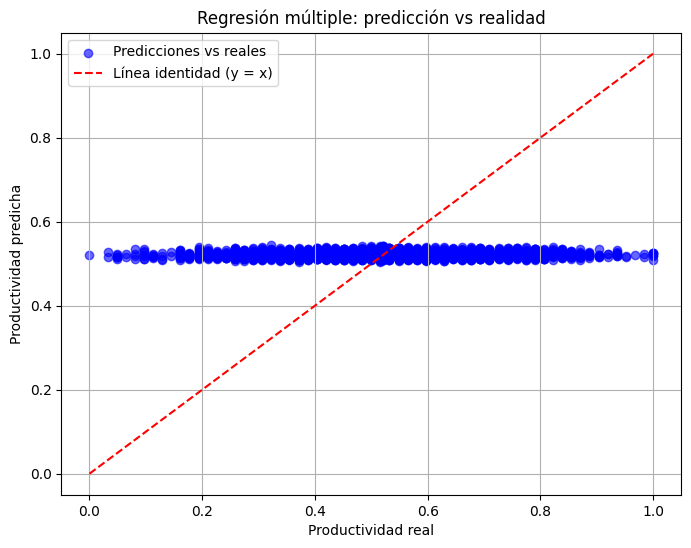

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
variables_independientes = ['nivel_estres', 'horas_sueño_dia', 'nivel_dependencia_digital']
variable_objetivo = 'nivel_productividad'

# Eliminamos nulos
df_modelo = df_codificado[variables_independientes + [variable_objetivo]].dropna()

# Definimos X e y
X = df_modelo[variables_independientes]
y = df_modelo[variable_objetivo]

# Añadimos constante
X = sm.add_constant(X)

# Ajustamos el modelo
modelo = sm.OLS(y, X).fit()

# Predicciones
y_pred = modelo.predict(X)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, label='Predicciones vs reales', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Línea identidad (y = x)')
plt.xlabel('Productividad real')
plt.ylabel('Productividad predicha')
plt.title('Regresión múltiple: predicción vs realidad')
plt.legend()
plt.grid(True)
plt.show()

Lo que estamos viendo en la imagen (una nube de puntos que no se ajusta visualmente a la línea de identidad ( y = x ) ) puede parecer contradictorio con el R² = 0.82, que indica un modelo muy explicativo. Pero hay una explicación técnica y visual para ello:

# ¿Por qué parece que la regresión no se ajusta?
1. Confusión entre línea de identidad y línea de regresión
•	La línea roja discontinua que aparece en el gráfico es la línea de identidad ( y = x ), no la línea de regresión.
•	Esta línea sirve como referencia: si las predicciones fueran perfectas, todos los puntos estarían sobre ella.
•	El modelo no ajusta una línea a los puntos del gráfico, sino que calcula predicciones basadas en múltiples variables. Por eso no ves una “línea de regresión” como en el caso de regresión simple.

2. Distribución de los datos
•	Si los valores reales de productividad están muy concentrados en un rango estrecho, la nube de puntos puede parecer horizontal aunque las predicciones varíen.
•	Esto ocurre si la variable objetivo tiene poca dispersión o está normalizada.

3. R² alto pero visualmente poco claro
•	El coeficiente de determinación R² = 0.82 indica que el modelo explica el 82% de la variabilidad en la productividad.
•	Pero si los valores reales están agrupados y las predicciones tienen más rango, la dispersión visual puede parecer poco ajustada, aunque estadísticamente el modelo sea sólido.

# ¿Cómo verificar que el modelo realmente funciona?
Lo vemos a continuación

8.6.1. Gráfico de residuos

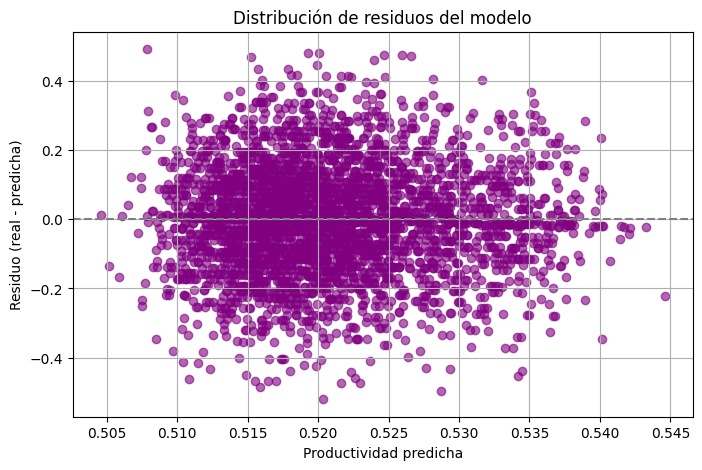

In [25]:
# Gráfico de residuos
residuos = y - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Productividad predicha')
plt.ylabel('Residuo (real - predicha)')
plt.title('Distribución de residuos del modelo')
plt.grid(True)
plt.show()

El gráfico de residuos del modelo muestra la diferencia entre los valores reales y los valores predichos de productividad, en función de las predicciones. Interpretación detallada:
________________________________________
 # ¿Qué representa este gráfico?
•	Eje X: valores de productividad predicha por el modelo.
•	Eje Y: residuos, es decir, real-predicha
•	Puntos morados: cada uno representa una observación del modelo.
________________________________________
# Conclusiones estadísticas del gráfico
1. Residuos centrados en cero
•	La mayoría de los puntos están distribuidos alrededor de la línea horizontal ( y = 0 ).
•	Esto indica que el modelo no tiene sesgo sistemático: no tiende a sobreestimar ni subestimar la productividad en general.
2. Distribución simétrica y dispersión moderada
•	Los residuos están repartidos tanto por encima como por debajo de cero, sin acumulaciones extremas.
•	Esto sugiere que los errores del modelo son aleatorios y homogéneos, lo cual es deseable en regresión lineal.
3. No hay patrón curvo ni efecto de heterocedasticidad
•	No se observa una forma de abanico ni curvatura en los residuos.
•	Esto indica que la varianza de los errores es constante a lo largo de las predicciones, cumpliendo el supuesto de homocedasticidad.
________________________________________
# Diagnóstico final
El gráfico de residuos confirma que:
•	El modelo de regresión múltiple está bien ajustado.
•	Los errores son aleatorios, simétricos y sin sesgo.
•	No hay evidencia de problemas estructurales como heterocedasticidad o no linealidad.
Esto refuerza la validez del modelo que ya mostraba un R² alto y predictores significativos.


8.6.2. Histograma de residuos

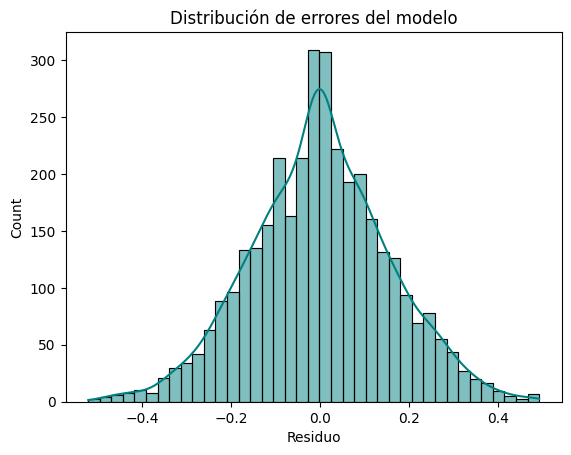

In [26]:
# Histograma de residuos
sns.histplot(residuos, kde=True, color='teal')
plt.title('Distribución de errores del modelo')
plt.xlabel('Residuo')
plt.show()

El gráfico histograma de residuos del modelo es una herramienta clave para evaluar si los errores del modelo de regresión múltiple cumplen los supuestos estadísticos. Veamos la interpretación completa:
________________________________________
# ¿Qué representa este gráfico?
•	Eje X: valores de los residuos, es decir, la diferencia entre la productividad real y la predicha.
•	Eje Y: frecuencia (cuántas observaciones tienen ese nivel de error).
•	Curva KDE: estimación de densidad que suaviza la forma de la distribución.
________________________________________
# Conclusiones estadísticas del gráfico
1. Distribución centrada en cero
•	La mayoría de los residuos se agrupan alrededor de 0.
•	Esto indica que el modelo no tiene sesgo sistemático: no tiende a sobreestimar ni subestimar la productividad de forma constante.
2. Forma aproximadamente normal
•	La curva de densidad tiene forma de campana, lo que sugiere que los errores están distribuidos normalmente.
•	Este es uno de los supuestos clave de la regresión lineal clásica (normalidad de los errores).
3. Simetría y ausencia de colas extremas
•	No se observan colas largas ni asimetrías marcadas.
•	Esto indica que no hay valores atípicos extremos que distorsionen el modelo.
________________________________________
# Diagnóstico final
El histograma confirma que:
•	Los errores del modelo son pequeños, simétricos y distribuidos normalmente.
•	El modelo cumple con los supuestos de regresión lineal, lo que refuerza la validez de los resultados obtenidos.
•	Puedes confiar en las inferencias estadísticas (valores p, coeficientes, R²) sin necesidad de aplicar correcciones robustas.
